# Imports

In [10]:
import os
import json
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, MaxAbsScaler, Normalizer, QuantileTransformer

In [11]:
# Carregando as configurações do arquivo 'config_modelo.json'
configs = json.load(open('configs/config.json', 'r'))
models = json.load(open('configs/modelo.json', 'r'))

In [12]:
# Criar a pasta 'save_dir' caso não exista no diretório
if not os.path.exists(models['model']['save_dir']):
            os.makedirs(models['model']['save_dir'])

In [13]:
# Carregar o Dataset
filepath = 'C:/Users/auW10/Documents/CodigosDoAu/000_Doutorado/dataset/'
df = pd.read_pickle(filepath+'dataset_ciclo1_multiclass_aug_dim_135_TIs_TargetPerc.pkl')
print(df.shape)
df.head(2)

(139881, 135)


,DATETIME,DATE,TIME,OPEN,HIGH,LOW,CLOSE,VOL,BBANDS_Upper_5,BBANDS_Lower_5,...,ATR_20,TRANGE,MES,DIA_SEMANA,HORA_NOBRE,TARGET_WIN,TARGET_WIN_CAT3,TARGET_WIN_CAT3_LABEL,PRICE_PERCENTAGE,TARGET_PERCENTAGE
0,2014-11-19 12:30:00,2014.11.19,12:30:00,53560.0,53565.0,53405.0,53410.0,8363.0,53752.526189,53227.473811,...,122.7500,160.0,11,2,2,15.0,HOLD,1,106.82,HOLD
1,2014-11-19 12:35:00,2014.11.19,12:35:00,53410.0,53500.0,53295.0,53415.0,7034.0,53712.281525,53317.718475,...,126.8625,205.0,11,2,2,50.0,HOLD,1,106.83,HOLD


In [14]:
df.tail(3)

,DATETIME,DATE,TIME,OPEN,HIGH,LOW,CLOSE,VOL,BBANDS_Upper_5,BBANDS_Lower_5,...,ATR_20,TRANGE,MES,DIA_SEMANA,HORA_NOBRE,TARGET_WIN,TARGET_WIN_CAT3,TARGET_WIN_CAT3_LABEL,PRICE_PERCENTAGE,TARGET_PERCENTAGE
139878,2020-02-21 17:35:00,2020.02.21,17:35:00,113780.0,113965.0,113745.0,113855.0,92666.0,113950.132808,113535.867192,...,144.733736,220.0,2,4,3,5.0,HOLD,1,227.71,HOLD
139879,2020-02-21 17:40:00,2020.02.21,17:40:00,113850.0,113890.0,113800.0,113825.0,39833.0,113888.345498,113705.654502,...,141.997049,90.0,2,4,3,55.0,HOLD,1,227.65,HOLD
139880,2020-02-21 17:45:00,2020.02.21,17:45:00,113830.0,113945.0,113610.0,113655.0,103553.0,113922.043471,113645.956529,...,151.647197,335.0,2,4,3,460.0,BUY,0,227.31,BUY


## Split dos Dados

In [15]:
# Listar colunas existentes
df.columns.tolist()
df.columns.array

<PandasArray>
[             'DATETIME',                  'DATE',                  'TIME',
                  'OPEN',                  'HIGH',                   'LOW',
                 'CLOSE',                   'VOL',        'BBANDS_Upper_5',
        'BBANDS_Lower_5',
 ...
                'ATR_20',                'TRANGE',                   'MES',
            'DIA_SEMANA',            'HORA_NOBRE',            'TARGET_WIN',
       'TARGET_WIN_CAT3', 'TARGET_WIN_CAT3_LABEL',      'PRICE_PERCENTAGE',
     'TARGET_PERCENTAGE']
Length: 135, dtype: object

In [16]:
# Dropando as respectivas colunas

print(df.shape)
df2 = df.drop([  'OPEN',                  
                 'HIGH',                   
                 'LOW',
                 'CLOSE',                   
                 'VOL',
                 'MES',
                 'TARGET_WIN',
                 'TARGET_WIN_CAT3', 
                 'TARGET_WIN_CAT3_LABEL',      
                 'PRICE_PERCENTAGE'
               
            
              ], axis=1)
print(df2.shape)
df2.head(2)

(139881, 135)
(139881, 125)


,DATETIME,DATE,TIME,BBANDS_Upper_5,BBANDS_Lower_5,BBANDS_Upper_10,BBANDS_Lower_10,BBANDS_Upper_20,BBANDS_Lower_20,DEMA_20,...,ADOSC,OBV,ATR_3,ATR_6,ATR_12,ATR_20,TRANGE,DIA_SEMANA,HORA_NOBRE,TARGET_PERCENTAGE
0,2014-11-19 12:30:00,2014.11.19,12:30:00,53752.526189,53227.473811,53701.563032,53003.436968,53582.216054,52961.783946,53513.521581,...,224.882410,16995.0,183.08836,157.567344,133.163314,122.7500,160.0,2,2,HOLD
1,2014-11-19 12:35:00,2014.11.19,12:35:00,53712.281525,53317.718475,53699.874976,53060.125024,53596.604149,52972.395851,53498.711770,...,-968.557883,24029.0,190.39224,165.472787,139.149704,126.8625,205.0,2,2,HOLD


In [17]:
df3 = df2[df2['DATETIME'].dt.year < 2020]
df3.drop(['DATE', 'TIME'], axis=1, inplace=True)
df4 = df3[df3['DATETIME'].dt.year > 2014].reset_index(drop=True)
#df4

C:\Users\auW10\anaconda3\envs\AlgoTrading\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


#### Split do DB em treino, validação e teste
##### Treino: 2015->2017
##### Validação: 2018
##### Teste: 2019 -> 2020

In [18]:
# SPLIT TRAIN

df_train = df2[(df2['DATETIME'] >= '2015-01-01') & (df2['DATETIME'] < '2018-01-01')]
#df_train = df2[(df2['DATETIME'] >= '2017-12-01') & (df2['DATETIME'] < '2019-07-01')]
#df_train = df_train.iloc[-10000:, :]

df_train = df2[(df2['DATETIME'] >= '2019-01-01') & (df2['DATETIME'] < '2019-09-01')]

#----------------------------------------------------------------------------------------------------
# SPLIT VALID

df_valid = df2[(df2['DATETIME'] >= '2018-01-01') & (df2['DATETIME'] < '2019-01-01')]
#df_valid = df2[(df2['DATETIME'] >= '2019-07-01') & (df2['DATETIME'] < '2020-03-01')]
#df_valid = df_valid.iloc[:6600, :]

df_valid = df2[(df2['DATETIME'] >= '2019-09-01') & (df2['DATETIME'] < '2020-01-01')]

#df_valid = df2[(df2['DATETIME'] >= '2018-01-01') & (df2['DATETIME'] < '2020-01-01')]

#----------------------------------------------------------------------------------------------------
# SPLIT TEST

df_test  = df2[(df2['DATETIME'] >= '2019-01-01') & (df2['DATETIME'] < '2020-01-01')]
#df_test  = df2[(df2['DATETIME'] >= '2020-01-01')]

#df_test  = df2[(df2['DATETIME'] < '2017-12-01')]
#df_test = df_test.iloc[:500,:]

df_test  = df2[(df2['DATETIME'] >= '2020-01-01')]

#----------------------------------------------------------------------------------------------------

print('Proporção Train: {:.1%} | Validation: {:.1%} | Test: {:.1%}'.format(
                                            df_train['DATETIME'].count()/df2['DATETIME'].count(),
                                            df_valid['DATETIME'].count()/df2['DATETIME'].count(),
                                            df_test['DATETIME'].count()/df2['DATETIME'].count()))

df_train.drop(['DATETIME', 'DATE', 'TIME'], axis=1, inplace=True)
df_valid.drop(['DATETIME', 'DATE', 'TIME'], axis=1, inplace=True)
df_test.drop(['DATETIME', 'DATE', 'TIME'], axis=1, inplace=True)
print(df_train.shape, df_valid.shape, df_test.shape)

Proporção Train: 12.8% | Validation: 6.4% | Test: 2.9%
(17849, 122) (8889, 122) (4064, 122)


C:\Users\auW10\anaconda3\envs\AlgoTrading\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


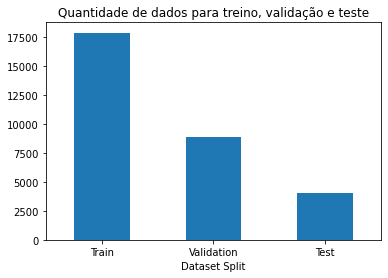

In [19]:
# Plot dos dados de treino, validação e teste
df_plot = pd.DataFrame({'Dataset Split':['Train', 'Validation', 'Test'], 
                        'val':[df_train.shape[0], df_valid.shape[0], df_test.shape[0]]})

ax_plot = df_plot.plot.bar(x='Dataset Split', 
                           y='val', 
                           rot=0, 
                           legend=False, 
                           title='Quantidade de dados para treino, validação e teste')

In [20]:
df_test.iloc[19:200].head(1)

,BBANDS_Upper_5,BBANDS_Lower_5,BBANDS_Upper_10,BBANDS_Lower_10,BBANDS_Upper_20,BBANDS_Lower_20,DEMA_20,EMA_5_CLOSE,EMA_10_CLOSE,EMA_20_CLOSE,...,ADOSC,OBV,ATR_3,ATR_6,ATR_12,ATR_20,TRANGE,DIA_SEMANA,HORA_NOBRE,TARGET_PERCENTAGE
135836,117489.521929,116862.478071,117397.405807,116813.594193,117349.698893,116850.801107,117269.240037,117228.122937,117137.461639,117010.529854,...,95344.558922,-7850190.0,212.171216,205.912372,197.823329,186.913789,165.0,3,1,HOLD


In [21]:
# Quantidade de dados de Treino com Targets de HOLD, BUY e SELL
df_train['TARGET_PERCENTAGE'].value_counts()

HOLD    13877
BUY      2041
SELL     1931
Name: TARGET_PERCENTAGE, dtype: int64

In [22]:
df_train['TARGET_PERCENTAGE'].value_counts()[0]

13877

In [23]:
hold_train = df_train['TARGET_PERCENTAGE'].value_counts()[0]
hold_valid = df_valid['TARGET_PERCENTAGE'].value_counts()[0]
hold_test = df_test['TARGET_PERCENTAGE'].value_counts()[0]

print('\nDados Categóricos de Treino -- BUY: %d | SELL: %d | HOLD: %d' % (df_train['TARGET_PERCENTAGE'].value_counts()[1], df_train['TARGET_PERCENTAGE'].value_counts()[2], hold_train))
print('\nDados Categóricos de Validação -- BUY: %d | SELL: %d | HOLD: %d' % (df_valid['TARGET_PERCENTAGE'].value_counts()[1], df_valid['TARGET_PERCENTAGE'].value_counts()[2], hold_valid))
print('\nDados Categóricos de Teste -- BUY: %d | SELL: %d | HOLD: %d' % (df_test['TARGET_PERCENTAGE'].value_counts()[1], df_test['TARGET_PERCENTAGE'].value_counts()[2], hold_test))



Dados Categóricos de Treino -- BUY: 2041 | SELL: 1931 | HOLD: 13877

Dados Categóricos de Validação -- BUY: 625 | SELL: 522 | HOLD: 7742

Dados Categóricos de Teste -- BUY: 380 | SELL: 355 | HOLD: 3329


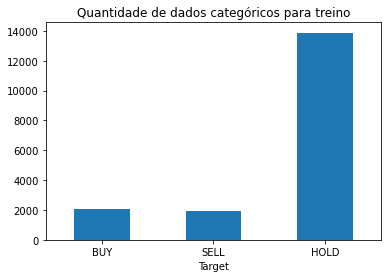

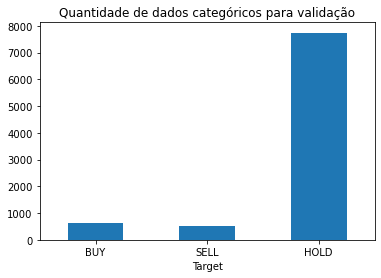

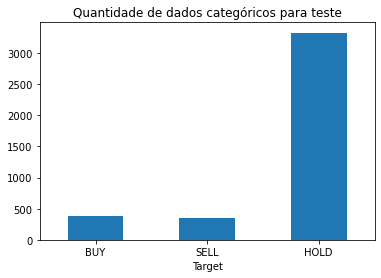

In [24]:
# Plot dos dados categóricos de treino, validação e teste

df_plot = pd.DataFrame({'Target':['BUY', 'SELL', 'HOLD'], 
                        'val':[df_train['TARGET_PERCENTAGE'].value_counts()[1], 
                               df_train['TARGET_PERCENTAGE'].value_counts()[2], 
                               hold_train]})

ax_plot = df_plot.plot.bar(x='Target', 
                               y='val', 
                               rot=0, 
                               legend=False, 
                               title='Quantidade de dados categóricos para treino')

df_plot = pd.DataFrame({'Target':['BUY', 'SELL', 'HOLD'], 
                        'val':[df_valid['TARGET_PERCENTAGE'].value_counts()[1], 
                               df_valid['TARGET_PERCENTAGE'].value_counts()[2], 
                               hold_valid]})

ax_plot = df_plot.plot.bar(x='Target', 
                               y='val', 
                               rot=0, 
                               legend=False, 
                               title='Quantidade de dados categóricos para validação')

df_plot = pd.DataFrame({'Target':['BUY', 'SELL', 'HOLD'], 
                        'val':[df_test['TARGET_PERCENTAGE'].value_counts()[1], 
                               df_test['TARGET_PERCENTAGE'].value_counts()[2], 
                               hold_test]})

ax_plot = df_plot.plot.bar(x='Target', 
                               y='val', 
                               rot=0, 
                               legend=False, 
                               title='Quantidade de dados categóricos para teste')

In [25]:
df_train.groupby(['HORA_NOBRE'])['TARGET_PERCENTAGE'].value_counts()

HORA_NOBRE  TARGET_PERCENTAGE
0           HOLD                  779
            SELL                  106
            BUY                   101
1           HOLD                 3448
            BUY                   757
            SELL                  745
2           HOLD                 6538
            BUY                   713
            SELL                  705
3           HOLD                 3112
            BUY                   470
            SELL                  375
Name: TARGET_PERCENTAGE, dtype: int64

In [26]:
# Separando apenas os dados que estejam dentro do HORÁRIO NOBRE

buy_train = df_train.groupby(['HORA_NOBRE'])['TARGET_PERCENTAGE'].value_counts()[4]
sell_train = df_train.groupby(['HORA_NOBRE'])['TARGET_PERCENTAGE'].value_counts()[5]
hold_train = df_train.groupby(['HORA_NOBRE'])['TARGET_PERCENTAGE'].value_counts()[3]

buy_valid = df_valid.groupby(['HORA_NOBRE'])['TARGET_PERCENTAGE'].value_counts()[4]
sell_valid = df_valid.groupby(['HORA_NOBRE'])['TARGET_PERCENTAGE'].value_counts()[5]
hold_valid = df_valid.groupby(['HORA_NOBRE'])['TARGET_PERCENTAGE'].value_counts()[3]

buy_test = df_test.groupby(['HORA_NOBRE'])['TARGET_PERCENTAGE'].value_counts()[4]
sell_test = df_test.groupby(['HORA_NOBRE'])['TARGET_PERCENTAGE'].value_counts()[5]
hold_test = df_test.groupby(['HORA_NOBRE'])['TARGET_PERCENTAGE'].value_counts()[3]

print('\nDados Categóricos de Treino Hora Nobre -- BUY: %d | SELL: %d | HOLD: %d' % (buy_train, sell_train, hold_train))
print('\nDados Categóricos de Validação Hora Nobre -- BUY: %d | SELL: %d | HOLD: %d' % (buy_valid, sell_valid, hold_valid))
print('\nDados Categóricos de Teste Hora Nobre -- BUY: %d | SELL: %d | HOLD: %d' % (buy_test, sell_test, hold_test))



Dados Categóricos de Treino Hora Nobre -- BUY: 757 | SELL: 745 | HOLD: 3448

Dados Categóricos de Validação Hora Nobre -- BUY: 268 | SELL: 234 | HOLD: 1958

Dados Categóricos de Teste Hora Nobre -- BUY: 146 | SELL: 129 | HOLD: 835


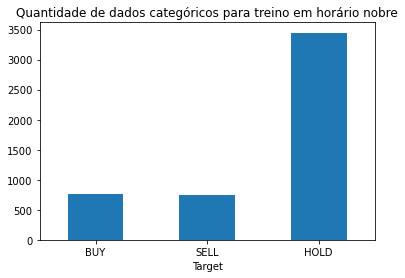

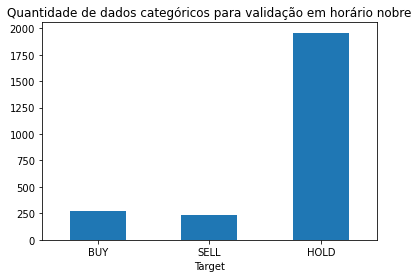

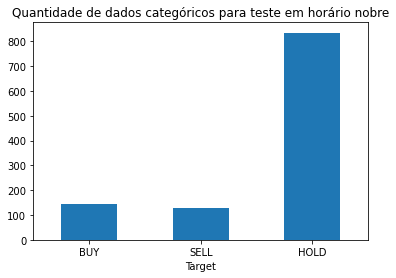

In [27]:
# Plot dos dados categóricos de treino, validação e teste - HORA NOBRE

df_plot = pd.DataFrame({'Target':['BUY', 'SELL', 'HOLD'], 
                        'val':[buy_train, sell_train, hold_train]})

ax_plot = df_plot.plot.bar(x='Target', 
                               y='val', 
                               rot=0, 
                               legend=False, 
                               title='Quantidade de dados categóricos para treino em horário nobre')

df_plot = pd.DataFrame({'Target':['BUY', 'SELL', 'HOLD'], 
                        'val':[buy_valid, sell_valid, hold_valid]})

ax_plot = df_plot.plot.bar(x='Target', 
                               y='val', 
                               rot=0, 
                               legend=False, 
                               title='Quantidade de dados categóricos para validação em horário nobre')

df_plot = pd.DataFrame({'Target':['BUY', 'SELL', 'HOLD'], 
                        'val':[buy_test, sell_test, hold_test]})

ax_plot = df_plot.plot.bar(x='Target', 
                               y='val', 
                               rot=0, 
                               legend=False, 
                               title='Quantidade de dados categóricos para teste em horário nobre')

### Aplicando a técnica de Undersampling para balancear a quantidade de dados categóricos
#### Através de uma amostragem aleatória utilizando distribuição normal

In [28]:
np.random.seed(2345)
porcentagem_selecao_train = (buy_train / hold_train)
amostra_train = np.random.choice( a=[0,1], size=hold_train, replace=True, 
                                   p=[1-porcentagem_selecao_train, porcentagem_selecao_train] )
print('Nº total da amostra: ', len(amostra_train))
print('Nº de dados selecionados para treino: ', len(amostra_train[amostra_train == 1]))
print('Nº de dados restantes que não serão considerados no treino: ', len(amostra_train[amostra_train == 0]))

Nº total da amostra:  3448
Nº de dados selecionados para treino:  754
Nº de dados restantes que não serão considerados no treino:  2694


In [29]:
np.random.seed(2345)
porcentagem_selecao_valid = (buy_valid / hold_valid)
amostra_valid = np.random.choice( a=[0,1], size=hold_valid, replace=True, 
                                   p=[1-porcentagem_selecao_valid, porcentagem_selecao_valid] )
print(len(amostra_valid))
print(len(amostra_valid[amostra_valid == 1]))
print(len(amostra_valid[amostra_valid == 0]))

1958
267
1691


In [30]:
np.random.seed(2345)
porcentagem_selecao_test = (buy_test / hold_test)
amostra_test = np.random.choice( a=[0,1], size=hold_test, replace=True, 
                                   p=[1-porcentagem_selecao_test, porcentagem_selecao_test] )
print(len(amostra_test))
print(len(amostra_test[amostra_test == 1]))
print(len(amostra_test[amostra_test == 0]))

835
143
692


In [31]:
# Padronização dos dados
def normalize(data):

    scaler_x = StandardScaler()

    x = data.iloc[:, :-2]
    x = scaler_x.fit_transform(x) 

    y = data.iloc[:,-1]
    y_list = np.array(y.to_list())

    return x, y_list

In [32]:
# Função para carregar os dados de treino, validação e teste
def get_train_valid_test_data(seq_len, df, amostragem):
    print('df.shape: ', df.shape)
    a=0
    # Loop para carregar apenas os dados do 'Undersampling'
    for i in range(len(df) - seq_len):
        if df['TARGET_PERCENTAGE'][i+seq_len-1] == 'HOLD':
            if amostragem[a] == 0:
                df.drop((i+seq_len-1), axis=0, inplace=True) 
            a+=1

    x, y = normalize(df)

    return x, y

In [33]:
# Movimentação da janela: normalizando janela a janela
def next_window(i, seq_len, df):
    df = df[i:i+seq_len]
    scaler_x = StandardScaler()
    
    x = df.iloc[:, :-2]
    # xxx = np.array(x)
    x = scaler_x.fit_transform(x) 
    
    y = df.iloc[-1,-1]
    # y_list = np.array(y.to_list())
    
    return x, y

In [34]:
# Função para carregar os dados de treino, validação e teste usando técnica de Slide Window
def get_train_valid_test_data_Slide_Window(seq_len, df, amostragem):
    print('df.shape: ', df.shape)
    a=0
    data_x = []
    data_y = []
    for i in range(len(df) - seq_len):
        if df['TARGET_PERCENTAGE'].iloc[i+seq_len-1] == 'HOLD':
            if amostragem[a] == 1:    
                x, y = next_window(i, seq_len, df)
                data_x.append(x)
                data_y.append(y)
            a+=1
        else:
            x, y = next_window(i, seq_len, df)
            data_x.append(x)
            data_y.append(y)

    return np.array(data_x), np.array(data_y)

##### Funções para carregar os features 'x' e os targets 'y' 

In [35]:
df_train_reset_index = df_train[df_train['HORA_NOBRE'] == '1'].reset_index(drop=True)
x_train, y_train = get_train_valid_test_data(seq_len=1, 
                                             df=df_train_reset_index, 
                                             amostragem=amostra_train)
print('x_train: ', x_train.shape,' | y_train: ', y_train.shape)

df.shape:  (4950, 122)
x_train:  (2256, 120)  | y_train:  (2256,)


In [36]:
df_train_reset_index = df_train[df_train['HORA_NOBRE'] == '1'].reset_index(drop=True)
x_train_sw, y_train_sw = get_train_valid_test_data_Slide_Window( seq_len=configs['dataset']['sequence_length'], 
                                                                 df=df_train_reset_index, 
                                                                 amostragem=amostra_train)
print('x_train_sw: ', x_train_sw.shape,' | y_train_sw: ', y_train_sw.shape)

df.shape:  (4950, 122)
x_train_sw:  (2253, 5, 120)  | y_train_sw:  (2253,)


In [37]:
df_valid_reset_index = df_valid[df_valid['HORA_NOBRE'] == '1'].reset_index(drop=True)
x_valid, y_valid = get_train_valid_test_data( seq_len=1, 
                                              df=df_valid_reset_index, 
                                              amostragem=amostra_valid )
print(x_valid.shape, y_valid.shape)

df.shape:  (2460, 122)
(769, 120) (769,)


In [38]:
df_valid_reset_index = df_valid[df_valid['HORA_NOBRE'] == '1'].reset_index(drop=True)
x_valid_sw, y_valid_sw = get_train_valid_test_data_Slide_Window( seq_len=configs['dataset']['sequence_length'], 
                                                                 df=df_valid_reset_index, 
                                                                 amostragem=amostra_valid )
print(x_valid_sw.shape, y_valid_sw.shape)

df.shape:  (2460, 122)
(767, 5, 120) (767,)


In [39]:
df_test_reset_index = df_test[df_test['HORA_NOBRE'] == '1'].reset_index(drop=True)
x_test, y_test = get_train_valid_test_data( seq_len=1, 
                                            df=df_test_reset_index, 
                                            amostragem=amostra_test )
print(x_test.shape, y_test.shape)

df.shape:  (1110, 122)
(419, 120) (419,)


In [40]:
df_test_reset_index = df_test[df_test['HORA_NOBRE'] == '1'].reset_index(drop=True)
x_test_sw, y_test_sw = get_train_valid_test_data_Slide_Window(   seq_len=configs['dataset']['sequence_length'], 
                                                                 df=df_test_reset_index, 
                                                                 amostragem=amostra_test)
print(x_test_sw.shape, y_test_sw.shape)

df.shape:  (1110, 122)
(415, 5, 120) (415,)


In [41]:
# Para conferir se o balanceamento de dados ocorreu corretamente.
def contagem_classes(data, name):
    cont_buy = 0
    cont_sell = 0
    cont_hold = 0
    for n in data:
        if ((n == 'BUY') or (n == 0)):
            cont_buy+=1
        if ((n == 'HOLD') or (n == 1)):
            cont_hold+=1
        if ((n == 'SELL') or (n == 2)):
            cont_sell+=1
    print('{}.size: '.format(name), data.size, ' | cont_buy: ', cont_buy, ' | cont_hold: ', cont_hold, ' | cont_sell: ', cont_sell)

In [42]:
print('Contagem de Classes\n')
print('-----------------------------------------------------------------------------------')
contagem_classes(y_train, 'y_train   ')
contagem_classes(y_train_sw, 'y_train_sw')
print('-----------------------------------------------------------------------------------')
contagem_classes(y_valid, 'y_valid   ')
contagem_classes(y_valid_sw, 'y_valid_sw')
print('-----------------------------------------------------------------------------------')
contagem_classes(y_test, 'y_test   ')
contagem_classes(y_test_sw, 'y_test_sw')
print('-----------------------------------------------------------------------------------')

Contagem de Classes

-----------------------------------------------------------------------------------
y_train   .size:  2256  | cont_buy:  757  | cont_hold:  754  | cont_sell:  745
y_train_sw.size:  2253  | cont_buy:  757  | cont_hold:  752  | cont_sell:  744
-----------------------------------------------------------------------------------
y_valid   .size:  769  | cont_buy:  268  | cont_hold:  267  | cont_sell:  234
y_valid_sw.size:  767  | cont_buy:  267  | cont_hold:  267  | cont_sell:  233
-----------------------------------------------------------------------------------
y_test   .size:  419  | cont_buy:  129  | cont_hold:  144  | cont_sell:  146
y_test_sw.size:  415  | cont_buy:  128  | cont_hold:  141  | cont_sell:  146
-----------------------------------------------------------------------------------


## Cálculo do Weighted F Score

In [43]:
def weightedFScore(confusion_matrix):
    beta_1 = math.pow(0.5, 2)
    beta_2 = math.pow(0.25, 2)
    beta_3 = math.pow(0.125, 2)
    
    num_tu = confusion_matrix[[0],[0]]
    num_tf = confusion_matrix[[1],[1]]
    num_td = confusion_matrix[[2],[2]]
    
    wrongF_trueU = confusion_matrix[[0],[1]]
    wrongD_trueU = confusion_matrix[[0],[2]]
    
    wrongU_trueF = confusion_matrix[[1],[0]]
    wrongD_trueF = confusion_matrix[[1],[2]]
  
    wrongU_trueD = confusion_matrix[[2],[0]]
    wrongF_trueD = confusion_matrix[[2],[1]]
    
    num_tp = num_tu + num_td + (beta_3 * num_tf)
    erro_tipo_1 = wrongU_trueD + wrongD_trueU
    erro_tipo_2 = wrongU_trueF + wrongD_trueF
    erro_tipo_3 = wrongF_trueU + wrongF_trueD
    
    num = (1 + beta_1 + beta_2) * num_tp
    den = num + erro_tipo_1 + (beta_1 * erro_tipo_2) + (beta_2 * erro_tipo_3)
    
    wFScore = num / den
    
    return wFScore

### Seleção de Atributos

In [44]:
from sklearn.ensemble import ExtraTreesClassifier
forest = ExtraTreesClassifier()
x_xxx = x_train[:, 40:]
forest.fit(x_xxx, y_train)
importancias = forest.feature_importances_

In [45]:
importancias

array([0.01423813, 0.01398578, 0.01342059, 0.01250033, 0.01159177,
       0.01154839, 0.01084865, 0.01395267, 0.01198107, 0.01065818,
       0.01093339, 0.01107698, 0.01190576, 0.010272  , 0.01076462,
       0.01213716, 0.01279146, 0.01209097, 0.01126708, 0.01144145,
       0.01370726, 0.01190012, 0.0128041 , 0.01375736, 0.01188751,
       0.01131369, 0.01232431, 0.01264593, 0.01166309, 0.0113458 ,
       0.01236457, 0.01377627, 0.01143425, 0.01211504, 0.0114615 ,
       0.0126161 , 0.01156786, 0.01142758, 0.01267537, 0.01315055,
       0.01138059, 0.01129982, 0.01313309, 0.01387795, 0.01196781,
       0.01411751, 0.01132009, 0.01122128, 0.01231553, 0.01171921,
       0.01167515, 0.01138525, 0.01161277, 0.01182376, 0.01098728,
       0.01116166, 0.01114711, 0.01185006, 0.0109444 , 0.01066452,
       0.01185819, 0.01246248, 0.01127032, 0.01200004, 0.0127149 ,
       0.01196777, 0.0123561 , 0.01211265, 0.0113272 , 0.01198102,
       0.01203877, 0.01663156, 0.01398757, 0.01662337, 0.01691

In [46]:
x_xxx.shape

(2256, 80)

In [47]:
x_train.shape

(2256, 120)

# Modelos

In [48]:
import lightgbm as lgbm
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## LightGBM

In [43]:
model_lgbm = lgbm.LGBMClassifier(n_jobs=-1, random_state=0, n_estimators=5, learning_rate=0.001, num_leaves=2**6,
                                 subsample=0.9, subsample_freq=1, colsample_bytree=1.)

model_lgbm.fit(x_train, y_train)
predict_lgbm = model_lgbm.predict(x_test)

accuracy_score_LGBM = accuracy_score(y_test, predict_lgbm)

print('Accuracy Score - LightGBM: ', accuracy_score_LGBM)

Accuracy Score - LightGBM:  0.35083532219570407


In [44]:
print(classification_report(y_test, predict_lgbm))

              precision    recall  f1-score   support

         BUY       0.00      0.00      0.00       129
        HOLD       0.33      0.01      0.01       144
        SELL       0.35      1.00      0.52       146

    accuracy                           0.35       419
   macro avg       0.23      0.34      0.18       419
weighted avg       0.24      0.35      0.19       419



C:\Users\auW10\anaconda3\envs\AlgoTrading\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\auW10\anaconda3\envs\AlgoTrading\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\auW10\anaconda3\envs\AlgoTrading\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, predict_lgbm, labels=["BUY", "HOLD", "SELL"])
confusion_matrix

array([[  0,   2, 127],
       [  0,   1, 143],
       [  0,   0, 146]], dtype=int64)

In [46]:
print('Contagem de Classes -> predict_lgbm\n')
contagem_classes(predict_lgbm, 'predict_lgbm')

Contagem de Classes -> predict_lgbm

predict_lgbm.size:  419  | cont_buy:  0  | cont_hold:  3  | cont_sell:  416


<AxesSubplot:>

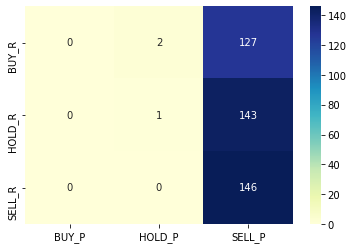

In [47]:
# visualize confusion matrix with seaborn heatmap
cm_matrix_LGBM = pd.DataFrame(data=confusion_matrix,
                        columns=['BUY_P', 'HOLD_P', 'SELL_P'], 
                        index=['BUY_R', 'HOLD_R', 'SELL_R'])

sns.heatmap(cm_matrix_LGBM, annot=True, fmt='d', cmap='YlGnBu')

In [48]:
weightedFScore_LGBM = weightedFScore(confusion_matrix)[0] 
weightedFScore_LGBM

0.5405766481465668

### Compare train and test set accuracy

In [ ]:
#y_pred_train = model_lgbm.predict(x_train)
#print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

### Check for Overfitting

In [ ]:
# print the scores on training and test set

#print('Training set score: {:.4f}'.format(model_lgbm.score(x_train, y_train)))

#print('Test set score: {:.4f}'.format(model_lgbm.score(x_test, y_test)))

In [ ]:
#print('Validation set score: {:.4f}'.format(model_lgbm.score(x_valid, y_valid)))

## Random Forest

In [49]:
model_randomF = RandomForestClassifier(n_jobs=-1, random_state=0, n_estimators=5)
model_randomF.fit(x_train, y_train)
predict_randomF = model_randomF.predict(x_test)

accuracy_score_RF = accuracy_score(y_test, predict_randomF)
print('Accuracy Score - Random Forest: ', accuracy_score_RF)

Accuracy Score - Random Forest:  0.31742243436754175


In [50]:
print(classification_report(y_test, predict_randomF))

              precision    recall  f1-score   support

         BUY       0.31      0.41      0.35       129
        HOLD       0.32      0.32      0.32       144
        SELL       0.33      0.23      0.27       146

    accuracy                           0.32       419
   macro avg       0.32      0.32      0.31       419
weighted avg       0.32      0.32      0.31       419



In [51]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, predict_randomF, labels=["BUY", "HOLD", "SELL"])
confusion_matrix

array([[53, 43, 33],
       [62, 46, 36],
       [56, 56, 34]], dtype=int64)

In [52]:
print('Contagem de Classes -> predict_randomF\n')
contagem_classes(predict_randomF, 'predict_randomF')

Contagem de Classes -> predict_randomF

predict_randomF.size:  419  | cont_buy:  171  | cont_hold:  145  | cont_sell:  103


<AxesSubplot:>

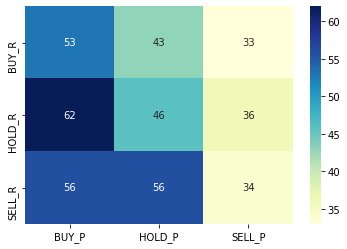

In [53]:
# visualize confusion matrix with seaborn heatmap
cm_matrix_RF = pd.DataFrame(data=confusion_matrix,
                        columns=['BUY_P', 'HOLD_P', 'SELL_P'], 
                        index=['BUY_R', 'HOLD_R', 'SELL_R'])

sns.heatmap(cm_matrix_RF, annot=True, fmt='d', cmap='YlGnBu')

In [54]:
weightedFScore_RF = weightedFScore(confusion_matrix)[0] 
weightedFScore_RF

0.49029752052367603

### Compare train and test set accuracy

In [ ]:
#y_pred_train = model_randomF.predict(x_train)
#print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

### Check for Overfitting

In [ ]:
# print the scores on training and test set

#print('Training set score: {:.4f}'.format(model_randomF.score(x_train, y_train)))

#print('Test set score: {:.4f}'.format(model_randomF.score(x_test, y_test)))

In [ ]:
#print('Validation set score: {:.4f}'.format(model_randomF.score(x_valid, y_valid)))

# Deep Learning

In [49]:
# Encoding categorical data
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

def encode_categ_data(data):
    labelencoder = LabelEncoder()
    x = labelencoder.fit_transform(data)
    data_encoded = to_categorical(x)
    
    #print(data[10:20])
    #print(data_encoded[10:20])
    
    return data_encoded

In [50]:
# example of training a final classification model
from keras.models import Sequential, load_model
from core.utils import Timer
from keras.layers import Dense, Dropout, LSTM, GRU, SimpleRNN
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import SGD, Adam
dim = x_train.shape[1]

## DNN

In [51]:
# define and fit the final model
timer = Timer()
timer.start()

model_dnn = Sequential()

model_dnn.add(Dense(100, input_dim=dim, activation='relu'))
model_dnn.add(Dropout(0.2))
model_dnn.add(Dense(75, activation='relu'))
model_dnn.add(Dropout(0.4))
model_dnn.add(Dense(50, activation='relu'))
model_dnn.add(Dropout(0.5))
model_dnn.add(Dense(25, activation='relu'))
model_dnn.add(Dropout(0.2))
model_dnn.add(Dense(3, activation='softmax'))

model_dnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print('[model] Model Compiled')
#print(model_dnn.summary())
timer.stop()


[model] Model Compiled
Time taken: 0:00:00.243100


In [ ]:
'''# define and fit the final model
timer = Timer()
timer.start()

model_dnn = Sequential()

model_dnn.add(Dense(100, input_dim=dim, activation='relu'))
model_dnn.add(Dropout(0.2))
model_dnn.add(Dense(50, activation='relu'))
model_dnn.add(Dropout(0.3))
model_dnn.add(Dense(30, activation='relu'))
model_dnn.add(Dropout(0.3))
model_dnn.add(Dense(15, activation='relu'))
model_dnn.add(Dropout(0.2))
model_dnn.add(Dense(3, activation='softmax'))

model_dnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print('[model] Model Compiled')
#print(model_dnn.summary())
timer.stop()
'''

In [52]:
### SIMPLÃO ###

# define and fit the final model
timer = Timer()
timer.start()

model_dnn = Sequential()

model_dnn.add(Dense(30, input_dim=dim, activation='relu'))
model_dnn.add(Dropout(0.4))
model_dnn.add(Dense(15, activation='relu'))
model_dnn.add(Dropout(0.4))
model_dnn.add(Dense(3, activation='softmax'))

model_dnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print('[model] Model Compiled')
#print(model_dnn.summary())
timer.stop()


[model] Model Compiled
Time taken: 0:00:00.133195


In [53]:
timer = Timer()
timer.start()
print('[Model] Training Started')

save_dir=models['model']['save_dir']
my_model=models['model']['model_name']
save_fname = os.path.join(save_dir, '%s_DNN.h5' % my_model)

batch_size=configs['training']['batch_size']

callbacks = [ ModelCheckpoint(filepath=save_fname, monitor='loss', save_best_only=True)]
es_callbacks = [ EarlyStopping(monitor='val_loss', patience=3) ]

y_train_enc = encode_categ_data(y_train)
y_valid_enc = encode_categ_data(y_valid)
H = model_dnn.fit( x_train, y_train_enc, validation_data=(x_valid, y_valid_enc), epochs=2, 
                   callbacks=callbacks, workers=1 )

model_dnn.save(save_fname)

print('[Model] Training Completed.')
print('Model saved as %s' % save_fname)

timer.stop()

[Model] Training Started
Epoch 1/2
71/71 [==============================] - 0s 5ms/step - loss: 1.4377 - accuracy: 0.3453 - val_loss: 1.0972 - val_accuracy: 0.3758
Epoch 2/2
71/71 [==============================] - 0s 3ms/step - loss: 1.1879 - accuracy: 0.3493 - val_loss: 1.0834 - val_accuracy: 0.3745
[Model] Training Completed.
Model saved as saved_models\doc_v2_DNN.h5
Time taken: 0:00:02.185033


In [54]:
# new instances where we do not know the answer
y_pred = model_dnn.predict(x_test) 
y_pred

array([[0.27487466, 0.35636818, 0.36875713],
       [0.28933135, 0.35590068, 0.35476798],
       [0.27639097, 0.3714014 , 0.35220757],
       ...,
       [0.41040558, 0.12616315, 0.46343124],
       [0.4215252 , 0.21796092, 0.36051384],
       [0.4030628 , 0.23413046, 0.3628068 ]], dtype=float32)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


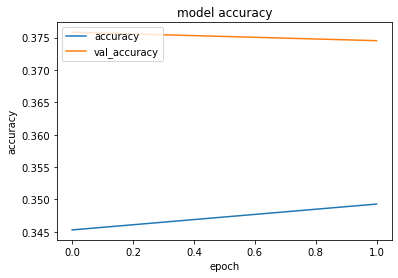

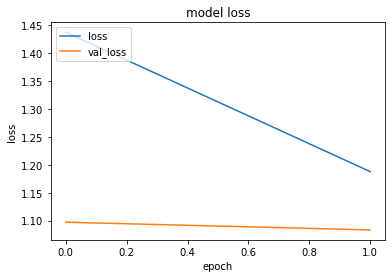

In [55]:
# list all data in history       
print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy'], loc='upper left')
fig_path = 'accuracy_history.png'
plt.savefig(fig_path)     
plt.show()

# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
fig_path = 'loss_history.png'
plt.savefig(fig_path) 
plt.show()

In [56]:
# BUY | SELL | HOLD

labels = ['BUY', 'HOLD', 'SELL'] 

pred = []
for i in y_pred:
    pred.append(np.argmax(i))
pred_array = np.array(pred)       

real = []
y_test_enc = encode_categ_data(y_test)
for i in y_test_enc:
    real.append(np.argmax(i))
real_array = np.array(real)    

In [57]:
print(y_pred[10:20])
print(y_test_enc[10:20])

[[0.26592216 0.42425472 0.3098231 ]
 [0.29451317 0.41229331 0.29319352]
 [0.35065588 0.38062295 0.26872113]
 [0.3583679  0.37550408 0.26612803]
 [0.21931204 0.39771318 0.38297483]
 [0.34005368 0.43195325 0.22799315]
 [0.44131157 0.3537136  0.20497487]
 [0.35474524 0.34277657 0.3024782 ]
 [0.296485   0.36847562 0.33503944]
 [0.22170927 0.4365044  0.34178635]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]


In [58]:
print(pred_array[10:20])
print(real_array[10:20])

[1 1 1 1 1 1 0 0 1 1]
[0 1 1 1 1 1 0 0 0 1]


In [59]:
accuracy_score_DNN = accuracy_score(real_array, pred_array)
print('Accuracy Score - DL: ', accuracy_score_DNN)

Accuracy Score - DL:  0.31742243436754175


In [60]:
print(classification_report(real_array, pred_array))

              precision    recall  f1-score   support

           0       0.30      0.25      0.27       129
           1       0.33      0.41      0.37       144
           2       0.31      0.29      0.30       146

    accuracy                           0.32       419
   macro avg       0.31      0.32      0.31       419
weighted avg       0.32      0.32      0.31       419



In [61]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(real_array, pred_array)
confusion_matrix

array([[32, 54, 43],
       [35, 59, 50],
       [40, 64, 42]], dtype=int64)

In [62]:
print('Contagem de Classes -> DNN_real_array\n')
contagem_classes(real_array, 'DNN_real_array')

Contagem de Classes -> DNN_real_array

DNN_real_array.size:  419  | cont_buy:  129  | cont_hold:  144  | cont_sell:  146


In [63]:
print('Contagem de Classes -> DNN_pred_array\n')
contagem_classes(pred_array, 'DNN_pred_array')

Contagem de Classes -> DNN_pred_array

DNN_pred_array.size:  419  | cont_buy:  107  | cont_hold:  177  | cont_sell:  135


<AxesSubplot:>

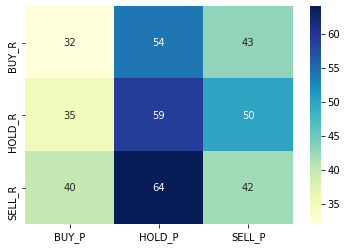

In [64]:
# visualize confusion matrix with seaborn heatmap
cm_matrix_DNN = pd.DataFrame(data=confusion_matrix,
                        columns=['BUY_P', 'HOLD_P', 'SELL_P'], 
                        index=['BUY_R', 'HOLD_R', 'SELL_R'])

sns.heatmap(cm_matrix_DNN, annot=True, fmt='d', cmap='YlGnBu')

In [65]:
weightedFScore_DNN = weightedFScore(confusion_matrix)[0] 
weightedFScore_DNN

0.468351015586119

In [66]:
y_pred_train = model_dnn.predict(x_train)

labels = ['BUY', 'HOLD', 'SELL'] 

pred = []
for i in y_pred_train:
    pred.append(np.argmax(i))
pred_array = np.array(pred)       

real = []
for i in y_train_enc:
    real.append(np.argmax(i))
real_array = np.array(real)    

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(real_array, pred_array)))

Training-set accuracy score: 0.4082


# Banco de Dados

In [184]:
import os
os.remove('models_performance000.db')

In [176]:
import sqlite3

In [177]:
# Criar conexão com o Banco de Dados
# Caso não exista o arquivo, este é criado
con = sqlite3.connect('models_performance000.db')

In [178]:
# Cursos para percorrer todos os registros em um conjunto de dados
cur = con.cursor()

In [157]:
# Instrução SQL
sql_create = 'create table if not exists models '+\
                '(Datetime TEXT PRIMARY KEY, '+\
                'Nome_Do_Modelo TEXT, '+\
                'dataframe_pkl_name TEXT, '+\
                'Accuracy_Score FLOAT, '+\
                'Weighted_FScore FLOAT, '+\
                'n_estimators INTEGER, '+\
                'sequence_length INTEGER, '+\
                'epochs INTEGER, '+\
                'loops INTEGER)'


In [158]:
# Exutar a instrução SQL no cursor
cur.execute(sql_create)

In [159]:
# Criando uma sentença SQL para inserir registros
sql_insert = 'insert into models values (?,?,?,?,?,?,?,?,?)'

In [160]:
# Dados a serem inseridos
recset = [('20210322_01-40-03', 'modelo1', 'top6', 0.333351, 0.51, 10000, 5, 20, 1),
          ('20210322_01-40-05', 'modelo2', 'top6', 0.444451, 0.61, 10000, 5, 20, 1),
          ('20210322_01-40-07', 'modelo3', 'top6', 0.555551, 0.71, 'NULL', 5, 20, 1)]

In [144]:
# Loop para inserir registros no banco de dados
for rec in recset:
    cur.execute(sql_insert, rec)

In [163]:
# Dados a serem inseridos
recset = ('20210322_01-40-03', 'modelo1', 'top6', 0.333351, 0.51, 10000, 5, 20, 1)

In [164]:
cur.execute(sql_insert, recset)

In [165]:
#Gravar a Transção
con.commit()

In [166]:
# Para consultar os dados
sql_select = 'select * from models'

In [167]:
# Selecionar todos os registros e recuperar os registros
cur.execute(sql_select)
dados_metricas = cur.fetchall()

In [168]:
# Loop para mostrar os dados
for linha in dados_metricas:
    print('Datetime: ', linha[0])

Datetime:  20210322_01-40-03


In [181]:
con.close()

# LSTM

In [40]:
# define and fit the final model
timer = Timer()
timer.start()
timesteps = configs['dataset']['sequence_length']

model_lstm = Sequential()

model_lstm.add(LSTM(200, input_shape=(timesteps, dim), return_sequences=True))
model_lstm.add(Dropout(0.1))
model_lstm.add(LSTM(150, input_shape=(timesteps, dim), return_sequences=True))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(100, input_shape=(timesteps, dim), return_sequences=True))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(100, input_shape=(timesteps, dim), return_sequences=True))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(100, input_shape=(timesteps, dim), return_sequences=True))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(50, input_shape=(timesteps, dim), return_sequences=False))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(3, activation='softmax'))

model_lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print('[model] Model Compiled')
#print(model_lstm.summary())
timer.stop()


[model] Model Compiled
Time taken: 0:00:02.358467


In [ ]:
'''# define and fit the final model
timer = Timer()
timer.start()
timesteps = configs['dataset']['sequence_length']

model_lstm = Sequential()

model_lstm.add(SimpleRNN(150, input_shape=(timesteps, dim), return_sequences=True))
model_lstm.add(Dropout(0.1))
model_lstm.add(SimpleRNN(125, input_shape=(timesteps, dim), return_sequences=True))
model_lstm.add(LSTM(100, input_shape=(timesteps, dim), return_sequences=True))
model_lstm.add(Dropout(0.3))
model_lstm.add(LSTM(100, input_shape=(timesteps, dim), return_sequences=True))
model_lstm.add(Dropout(0.3))
model_lstm.add(GRU(100, input_shape=(timesteps, dim), return_sequences=True))
model_lstm.add(Dropout(0.3))
model_lstm.add(SimpleRNN(100, input_shape=(timesteps, dim), return_sequences=True))
model_lstm.add(Dropout(0.3))
model_lstm.add(GRU(100, input_shape=(timesteps, dim), return_sequences=True))
model_lstm.add(Dropout(0.3))
model_lstm.add(LSTM(100, input_shape=(timesteps, dim), return_sequences=True))
model_lstm.add(Dropout(0.3))
model_lstm.add(GRU(100, input_shape=(timesteps, dim), return_sequences=True))
model_lstm.add(SimpleRNN(90, input_shape=(timesteps, dim), return_sequences=True))
model_lstm.add(Dropout(0.3))
model_lstm.add(GRU(80, input_shape=(timesteps, dim), return_sequences=True))
model_lstm.add(GRU(70, input_shape=(timesteps, dim), return_sequences=True))
model_lstm.add(Dropout(0.3))
model_lstm.add(LSTM(75, input_shape=(timesteps, dim), return_sequences=True))
model_lstm.add(GRU(75, input_shape=(timesteps, dim), return_sequences=True))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(50, input_shape=(timesteps, dim), return_sequences=False))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(3, activation='softmax'))

model_lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print('[model] Model Compiled')
#print(model_lstm.summary())
timer.stop()
'''

In [41]:
### SIMPLÃO ###

# define and fit the final model
timer = Timer()
timer.start()
timesteps = configs['dataset']['sequence_length']

model_lstm = Sequential()

model_lstm.add(LSTM(100, input_shape=(timesteps, dim), return_sequences=True))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(50, input_shape=(timesteps, dim), return_sequences=False))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(3, activation='softmax'))

model_lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print('[model] Model Compiled')
#print(model_lstm.summary())
timer.stop()


[model] Model Compiled
Time taken: 0:00:01.423953


In [42]:
timer = Timer()
timer.start()
print('[Model] Training Started')

save_dir=models['model']['save_dir']
my_model=models['model']['model_name']
save_fname = os.path.join(save_dir, '%s_LSTM_activTanh.h5' % my_model)

batch_size=configs['training']['batch_size']

callbacks = [ ModelCheckpoint(filepath=save_fname, monitor='loss', save_best_only=True)]

y_train_sw_enc = encode_categ_data(y_train_sw)
y_valid_sw_enc = encode_categ_data(y_valid_sw)
H = model_lstm.fit( x_train_sw, y_train_sw_enc, validation_data=(x_valid_sw, y_valid_sw_enc), epochs=2, 
                    batch_size=batch_size, callbacks=callbacks, workers=1 )

model_lstm.save(save_fname)

print('[Model] Training Completed.')
print('Model saved as %s' % save_fname)

timer.stop()

[Model] Training Started
Epoch 1/2
16/16 [==============================] - 2s 102ms/step - loss: 1.0984 - accuracy: 0.3427 - val_loss: 1.0946 - val_accuracy: 0.3872
Epoch 2/2
16/16 [==============================] - 0s 22ms/step - loss: 1.0810 - accuracy: 0.4026 - val_loss: 1.0943 - val_accuracy: 0.3911
[Model] Training Completed.
Model saved as saved_models\doc_v2_LSTM_activTanh.h5
Time taken: 0:00:08.129027


In [76]:
# new instances where we do not know the answer
y_pred = model_lstm.predict(x_test_sw) 
y_pred

array([[0.2453838 , 0.33738154, 0.41723466],
       [0.32086417, 0.32554948, 0.35358638],
       [0.37477612, 0.29347506, 0.33174878],
       ...,
       [0.33269653, 0.41244677, 0.25485677],
       [0.389455  , 0.2912177 , 0.3193273 ],
       [0.367631  , 0.30934554, 0.3230235 ]], dtype=float32)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


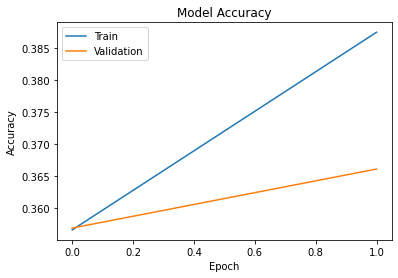

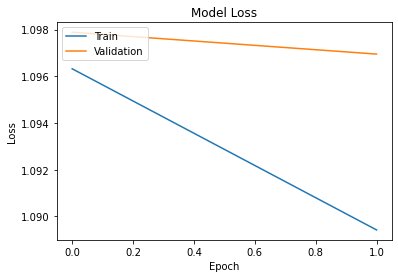

In [77]:
# list all data in history       
print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
fig_path = 'accuracy_history.png'
plt.savefig(fig_path)     
plt.show()

# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
fig_path = 'loss_history.png'
plt.savefig(fig_path) 
plt.show()

In [78]:
# BUY | SELL | HOLD

labels = ['BUY', 'HOLD', 'SELL'] 

pred = []
for i in y_pred:
    pred.append(np.argmax(i))
pred_array = np.array(pred)       

real = []
y_test_sw_enc = encode_categ_data(y_test_sw)
for i in y_test_sw_enc:
    real.append(np.argmax(i))
real_array = np.array(real)   

In [79]:
print(y_pred[0:10])
print(pred_array[0:10])

[[0.2453838  0.33738154 0.41723466]
 [0.32086417 0.32554948 0.35358638]
 [0.37477612 0.29347506 0.33174878]
 [0.24091563 0.57584155 0.1832428 ]
 [0.27335775 0.53791887 0.18872336]
 [0.3655565  0.33351904 0.3009245 ]
 [0.35036337 0.3432478  0.30638885]
 [0.32984662 0.36831653 0.30183688]
 [0.25303525 0.49337208 0.2535927 ]
 [0.2608361  0.48550028 0.25366357]]
[2 2 0 1 1 0 0 1 1 1]


In [80]:
print(y_test_sw_enc[100:110])
print(real_array[100:110])

[[0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]]
[1 0 0 0 2 2 2 2 2 1]


In [81]:
accuracy_score_LSTM = accuracy_score(real_array, pred_array)
print('Accuracy Score - LSTM: ', accuracy_score_LSTM)

Accuracy Score - LSTM:  0.3301204819277108


In [82]:
print(classification_report(real_array, pred_array))

              precision    recall  f1-score   support

           0       0.27      0.23      0.25       128
           1       0.34      0.48      0.40       141
           2       0.37      0.27      0.31       146

    accuracy                           0.33       415
   macro avg       0.33      0.33      0.32       415
weighted avg       0.33      0.33      0.32       415



In [83]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(real_array, pred_array)
confusion_matrix

array([[29, 64, 35],
       [40, 68, 33],
       [39, 67, 40]], dtype=int64)

In [84]:
print('Contagem de Classes -> LSTM_real_array\n')
contagem_classes(real_array, 'LSTM_real_array')

Contagem de Classes -> LSTM_real_array

LSTM_real_array.size:  415  | cont_buy:  128  | cont_hold:  141  | cont_sell:  146


In [85]:
print('Contagem de Classes -> LSTM_pred_array\n')
contagem_classes(pred_array, 'LSTM_pred_array')

Contagem de Classes -> LSTM_pred_array

LSTM_pred_array.size:  415  | cont_buy:  108  | cont_hold:  199  | cont_sell:  108


In [86]:
weightedFScore_LSTM = weightedFScore(confusion_matrix)[0] 
weightedFScore_LSTM

0.47796073335634376

<AxesSubplot:>

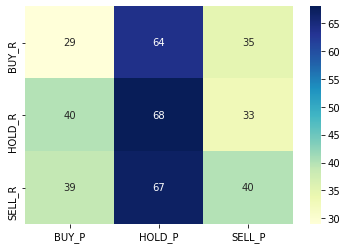

In [87]:
# visualize confusion matrix with seaborn heatmap
cm_matrix_LSTM = pd.DataFrame(data=confusion_matrix,
                        columns=['BUY_P', 'HOLD_P', 'SELL_P'], 
                        index=['BUY_R', 'HOLD_R', 'SELL_R'])

sns.heatmap(cm_matrix_LSTM, annot=True, fmt='d', cmap='YlGnBu')

In [88]:
y_pred_train_sw = model_lstm.predict(x_train_sw)

labels = ['BUY', 'HOLD', 'SELL'] 

pred = []
for i in y_pred_train_sw:
    pred.append(np.argmax(i))
pred_array = np.array(pred)       

real = []
y_train_sw_enc = encode_categ_data(y_train_sw)
for i in y_train_sw_enc:
    real.append(np.argmax(i))
real_array = np.array(real)    

print('Training-set accuracy score LSTM: {0:0.4f}'. format(accuracy_score(real_array, pred_array)))

Training-set accuracy score LSTM: 0.3968


# Resumo

In [89]:
print('-------------Resumo-------------')

print('\nAccuracy Score - LGBM: ', accuracy_score_LGBM)
print('Weighted F Score - LGBM: ', weightedFScore_LGBM)

print('\nAccuracy Score - Random Forest: ', accuracy_score_RF)
print('Weighted F Score - Random Forest: ', weightedFScore_RF)

print('\nAccuracy Score - DNN: ', accuracy_score_DNN)
print('Weighted F Score - DNN: ', weightedFScore_DNN)

print('\nAccuracy Score - LSTM: ', accuracy_score_LSTM)
print('Weighted F Score - LSTM: ', weightedFScore_LSTM)

-------------Resumo-------------

Accuracy Score - LGBM:  0.35083532219570407
Weighted F Score - LGBM:  0.5405766481465668

Accuracy Score - Random Forest:  0.31742243436754175
Weighted F Score - Random Forest:  0.49029752052367603

Accuracy Score - DNN:  0.3627684964200477
Weighted F Score - DNN:  0.5226462767424669

Accuracy Score - LSTM:  0.3301204819277108
Weighted F Score - LSTM:  0.47796073335634376


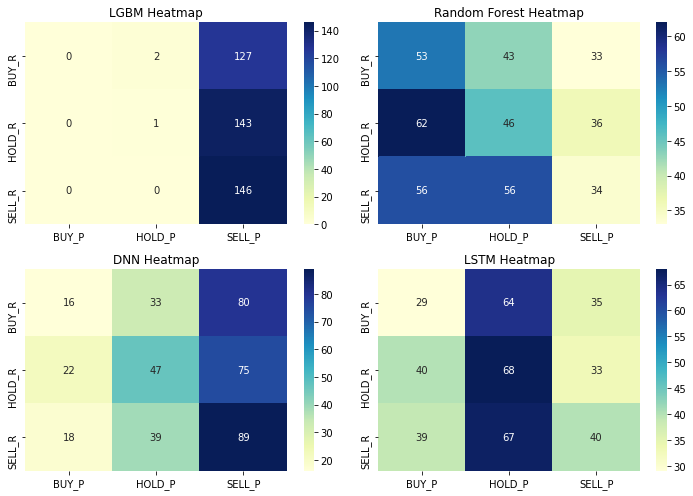

In [90]:
plt.figure(figsize=[10,7])
plt.subplot(2,2,1)
plt.title('LGBM Heatmap')
sns.heatmap(cm_matrix_LGBM, annot=True, fmt='d', cmap='YlGnBu')

plt.subplot(2,2,2)
plt.title('Random Forest Heatmap')
sns.heatmap(cm_matrix_RF, annot=True, fmt='d', cmap='YlGnBu')

plt.subplot(2,2,3)
plt.title('DNN Heatmap')
sns.heatmap(cm_matrix_DNN, annot=True, fmt='d', cmap='YlGnBu')

plt.subplot(2,2,4)
plt.title('LSTM Heatmap')
sns.heatmap(cm_matrix_LSTM, annot=True, fmt='d', cmap='YlGnBu')

plt.tight_layout()

In [91]:
# save trained model
#pickle.dump( model_lgbm, open( 'saved_models/model_LGBM_135features_5000.pkl', 'wb' ) )

In [92]:
#pickle.dump( model_dnn, open( 'saved_models/model_DNN_135features_50.pkl', 'wb' ) )

In [93]:
#pickle.dump( model_randomF, open( 'saved_models/model_RF_135features_5000.pkl', 'wb' ) )